<a href="https://colab.research.google.com/github/Aryanchib/DataScience_Assignment/blob/main/A5_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data cleaning and preparation

In [ ]:
# The %matplotlib inline magic command is used in Jupyter notebooks to display matplotlib plots directly within the notebook.
# When you use this command, any plots generated by matplotlib will be shown inline, meaning they will appear directly below the code
# cell that produced them, rather than in a separate window.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/sample_data/Cardiotocographic.csv')
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


Checking  if they have correct dtypes

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [ ]:
data.isnull().sum()

,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


* Since missing data is less than 5%, So we are going to replace it with mean or medain, depending on the skewness if the skewness is between [-0.5 to +0.5] its called moderate skewness then we will replace than column with its mean
* and if the skewness is lies [-1 to 0.5] or [0.5-1.0] then its considered as high skewness and we will replace missing vlaue with the median of that column.

In [ ]:
num_col_wi_miss_data= ['LB','AC','DS','DP','MLTV','Width','Tendency','NSP']
#after finding null values replacing or filling null values with mean & median respectively
for val in data[num_col_wi_miss_data].skew():
  if -0.5<val<0.5:
    data[num_col_wi_miss_data]=data[num_col_wi_miss_data].fillna(data[num_col_wi_miss_data].mean())
  else:
    data[num_col_wi_miss_data]=data[num_col_wi_miss_data].fillna(data[num_col_wi_miss_data].median())



In [ ]:
data.isnull().sum()

,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


* Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
* But its consistent already as we can see(all are having float data n the data type is also float)

In [ ]:
data.dtypes

,0
LB,float64
AC,float64
FM,float64
UC,float64
DL,float64
DS,float64
DP,float64
ASTV,float64
MSTV,float64
ALTV,float64


* Detecting and treating outliers now

In [ ]:
num_col = data.select_dtypes(include=['number']).columns
num_col

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [ ]:
#finding outliers using IQR method
for col in num_col:
  Q1 = data[col].quantile(0.25)
  Q3= data[col].quantile(0.75)
  IQR = Q3-Q1
  lower_limit=Q1-1.5*IQR
  upper_limit = Q3+1.5*IQR
# the values which are greater than upper_bound and less than lower_bound they are treated as outliers
  outliers = data[(data[col]<lower_limit) | (data[col]>upper_limit)]
  if len(outliers):
    print(f'Outliers detected in column {col} :')
    print(outliers[[col]])



Outliers detected in column LB :
              LB
134    52.000000
411   214.000000
610   214.000000
612   214.000000
785    52.000000
1027   51.842487
1103  214.000000
1406  214.000000
1504  214.000000
1834   52.188547
Outliers detected in column AC :
            AC
8     0.038567
23   -0.019284
83    0.014706
85    0.014230
116   0.038567
157  -0.019284
181   0.017241
496   0.014178
497   0.015552
498   0.015258
500   0.014178
501   0.014726
526   0.015013
527   0.014065
529   0.019284
530   0.015590
531   0.016423
552   0.015782
616   0.014806
626   0.038567
630   0.017391
681  -0.019284
999   0.014024
1000  0.014907
1066  0.014303
1093  0.015642
1094  0.017668
1096  0.017341
1231  0.038567
1248  0.017857
1311  0.014320
1312  0.015113
1687  0.014400
1752 -0.019284
1857  0.014068
1858  0.015907
1859  0.017073
1860  0.015166
1861  0.014444
1862  0.016000
1866  0.014842
1918  0.038567
2060  0.038567
Outliers detected in column FM :
            FM
12    0.072335
13    0.222390
14    0.4

In [ ]:
#considering only the values which are >= lower_bound and <= upper_bound
# means either we can delete outliers or can consider only values wihtout outliers
# but we need to give it proper indexation using reset_index function
data=data[(data[col]>=lower_limit)&(data[col]<=upper_limit)]
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.0
12,131.000000,0.005076,0.072335,0.007614,0.002538,0.0,0.0,28.0,1.4,-0.702936,12.9,66.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,140.000000,0.000000,0.000000,0.007812,0.000000,0.0,0.0,79.0,0.3,20.000000,8.5,26.0,1.002932,1.0
2118,140.000000,0.000000,0.000000,0.006470,0.000898,0.0,0.0,79.0,0.5,26.428179,7.0,21.0,1.000000,1.0
2119,140.000000,0.000000,0.000000,0.006764,0.001127,0.0,0.0,79.0,0.6,27.000000,6.4,26.0,1.000000,1.0
2120,140.000000,0.000000,0.000000,0.004975,0.001244,0.0,0.0,77.0,0.7,17.000000,6.0,31.0,0.000000,1.0


In [ ]:
data.reset_index(inplace=True)
data


,level_0,index,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,0,1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.0
1,1,2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.0
2,2,3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.0
3,3,4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.0
4,4,12,131.000000,0.005076,0.072335,0.007614,0.002538,0.0,0.0,28.0,1.4,-0.702936,12.9,66.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1541,2117,140.000000,0.000000,0.000000,0.007812,0.000000,0.0,0.0,79.0,0.3,20.000000,8.5,26.0,1.002932,1.0
1542,1542,2118,140.000000,0.000000,0.000000,0.006470,0.000898,0.0,0.0,79.0,0.5,26.428179,7.0,21.0,1.000000,1.0
1543,1543,2119,140.000000,0.000000,0.000000,0.006764,0.001127,0.0,0.0,79.0,0.6,27.000000,6.4,26.0,1.000000,1.0
1544,1544,2120,140.000000,0.000000,0.000000,0.004975,0.001244,0.0,0.0,77.0,0.7,17.000000,6.0,31.0,0.000000,1.0


In [ ]:
data.drop('index',axis=1,inplace=True)
data
# or we can drop both the columns by making a list
# data.drop(['index','level_0'],axis=1,inplace=True)

KeyError: "['index'] not found in axis"

In [ ]:
data.drop('level_0',axis=1,inplace=True)
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.0
1,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.0
2,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.0
3,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.0
4,131.000000,0.005076,0.072335,0.007614,0.002538,0.0,0.0,28.0,1.4,-0.702936,12.9,66.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,140.000000,0.000000,0.000000,0.007812,0.000000,0.0,0.0,79.0,0.3,20.000000,8.5,26.0,1.002932,1.0
1542,140.000000,0.000000,0.000000,0.006470,0.000898,0.0,0.0,79.0,0.5,26.428179,7.0,21.0,1.000000,1.0
1543,140.000000,0.000000,0.000000,0.006764,0.001127,0.0,0.0,79.0,0.6,27.000000,6.4,26.0,1.000000,1.0
1544,140.000000,0.000000,0.000000,0.004975,0.001244,0.0,0.0,77.0,0.7,17.000000,6.0,31.0,0.000000,1.0


# 2. Statistical Summary

In [ ]:
statistics_summary = data.describe()
print("Statistics Summary:")
print(statistics_summary)

Statistics Summary:
                LB           AC           FM           UC           DL  \
count  1546.000000  1546.000000  1546.000000  1546.000000  1546.000000   
mean    131.919815     0.004063     0.007579     0.004829     0.001920   
std      11.115063     0.004393     0.054729     0.003313     0.003111   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     125.000000     0.000000     0.000000     0.002788     0.000000   
50%     132.000000     0.002973     0.000000     0.004881     0.000000   
75%     138.000000     0.006672     0.001987     0.006816     0.003534   
max     214.000000     0.038567     0.961268     0.030002     0.030621   

                DS           DP         ASTV         MSTV         ALTV  \
count  1546.000000  1546.000000  1546.000000  1546.000000  1546.000000   
mean     -0.000003     0.000077    42.207271     1.461245     5.455809   
std       0.000111     0.000683    17.422340     1.116480    15.659211   
min      -0.00135

# 3. Data Visualization
●	Create **histograms or boxplots** to visualize the distributions of various numerical variables.
●	Use **bar charts** or pie charts to display the frequency of categories for categorical variables.
●	Generate **scatter plots or correlation heatmaps** to explore relationships between pairs of variables.
●	Employ advanced visualization techniques like** pair plots**, or violin plots for deeper insights.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

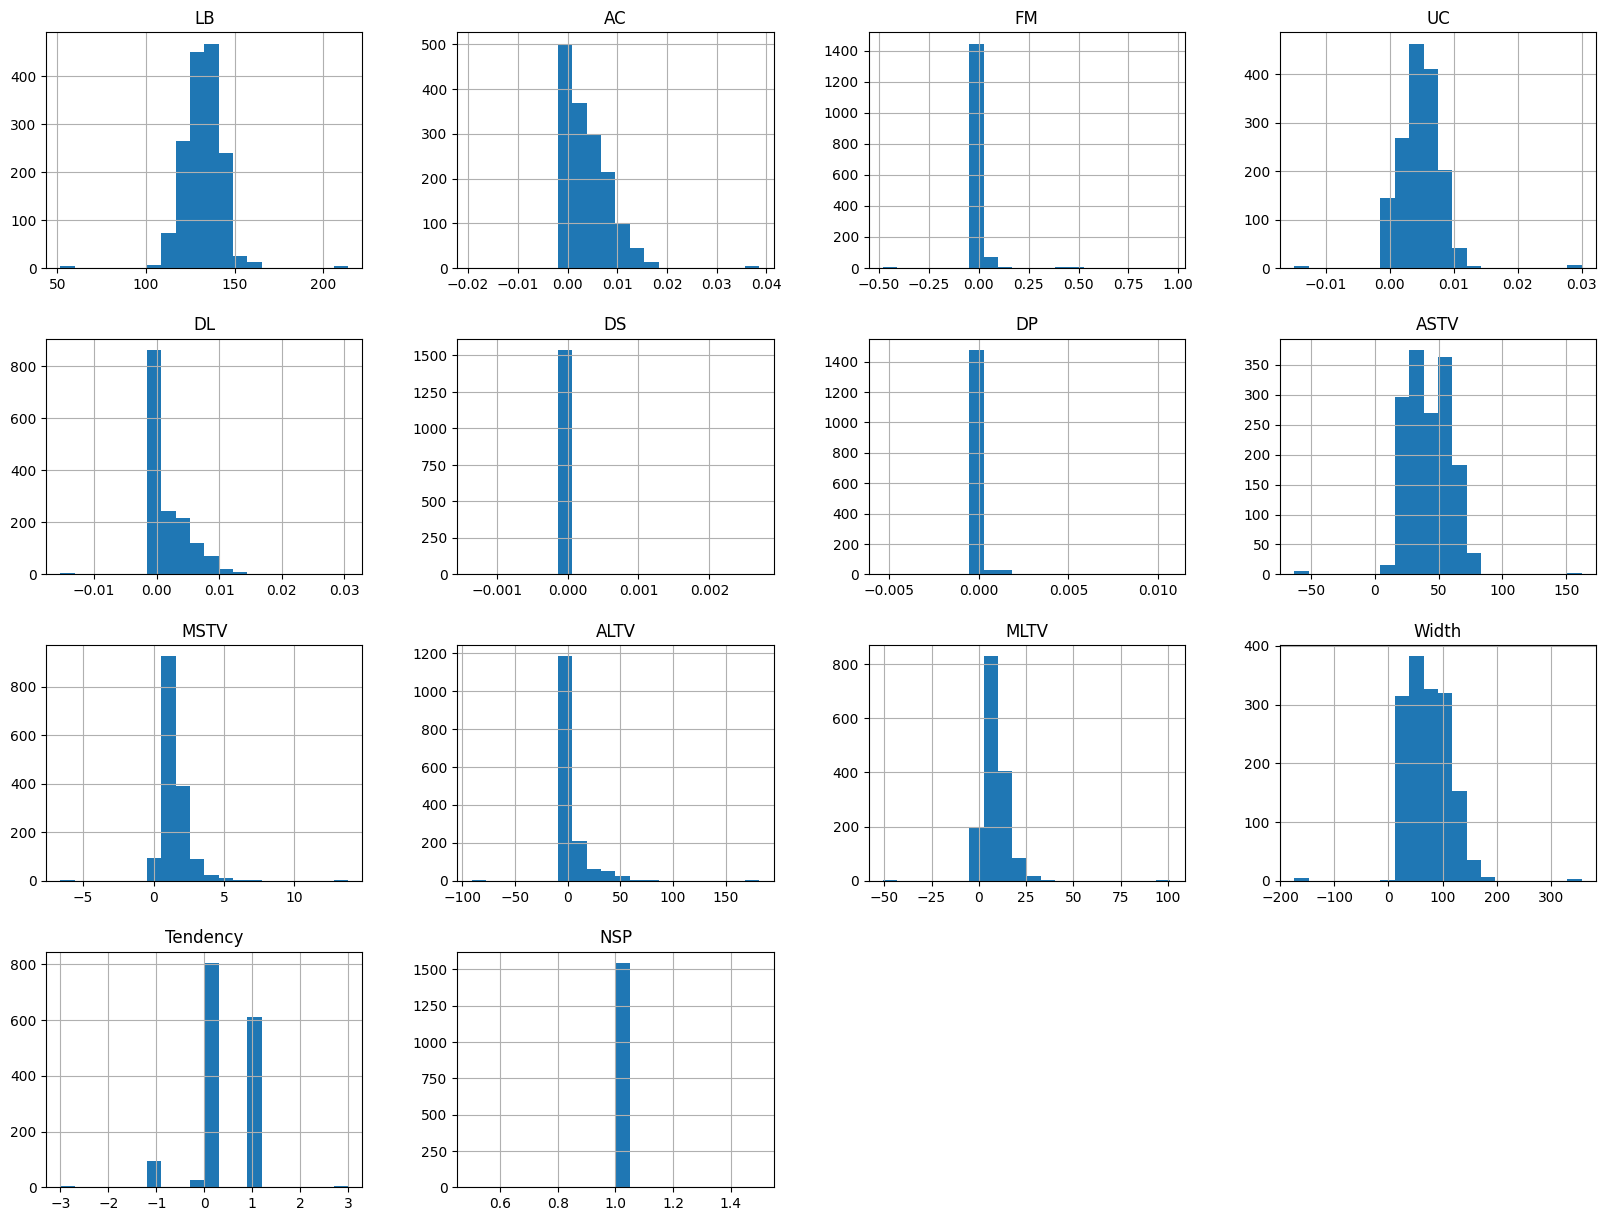

In [ ]:
data.hist(bins =20,figsize=(20,15))
plt.show()

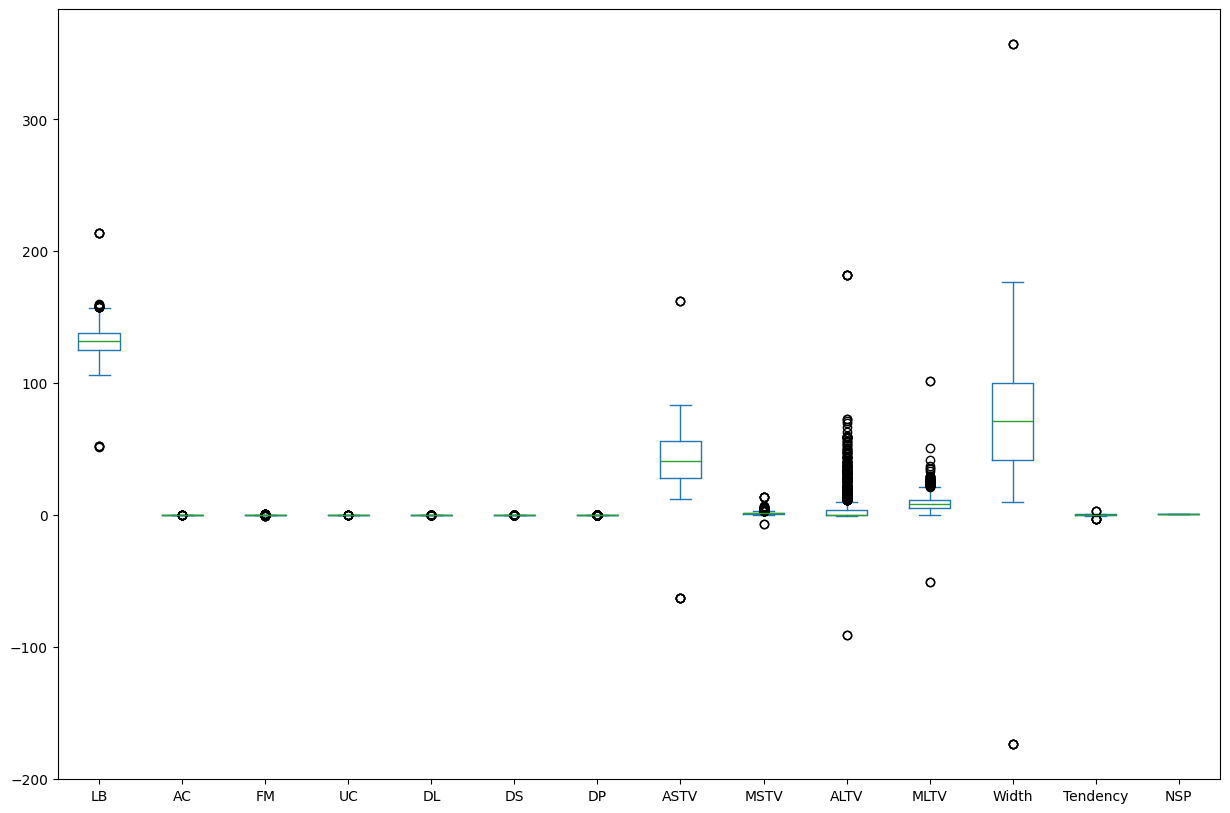

In [ ]:
data.plot(kind='box',figsize=(15,10))
plt.show()

* A heatmap is a great way to visually inspect the relationships between multiple variables in a dataset.
It helps to quickly identify:
Strong positive correlations (variables moving in the same direction).
Strong negative correlations (variables moving in opposite directions).
Variables with weak or no correlations.

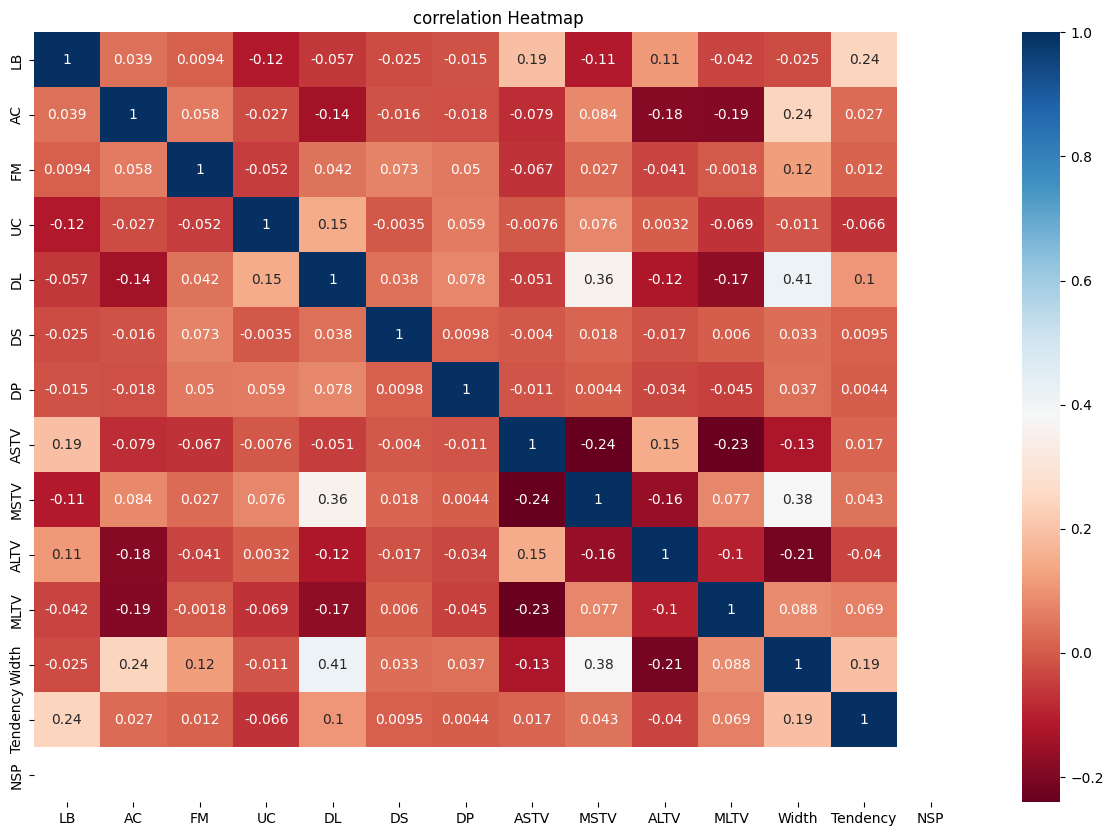

In [ ]:
plt.figure(figsize=(15,10))
correlation_matrix=data.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='RdBu')
plt.title('correlation Heatmap')
plt.show()

* This code is used to create a heatmap of the correlation matrix of a dataset, which is a visual representation of how different variables (columns) in the dataset are related to each other.
* figsize=(15, 10) means the figure will be 15 inches wide and 10 inches tall.
* data.corr() calculates the correlation matrix of the dataset data.
The correlation matrix shows the pairwise correlation coefficients between all numeric columns in the dataset. [0.5-1.0] --> tells highly +ve correlation (liner correation, as one variable increases , the other also increases.
[-1 to -0.5] shows -ve correlation i.e. inverse, as one variable increases, the other decreases
[-0.5 to +0.5] shows moderate correation
values close to 0 depicts no correltion
* This line uses Seaborn's heatmap() function to plot the correlation matrix as a heatmap
* annot=True: This argument means that the numerical values of the correlation coefficients will be annotated (displayed) inside the heatmap cells.
* cmap='RdBu': This argument specifies the color map (a color scale) to be used for the heatmap. 'RdBu' is a color map that uses a red-blue color scheme. High negative correlations will be in red, positive correlations will be in blue, and neutral correlations will be in white.


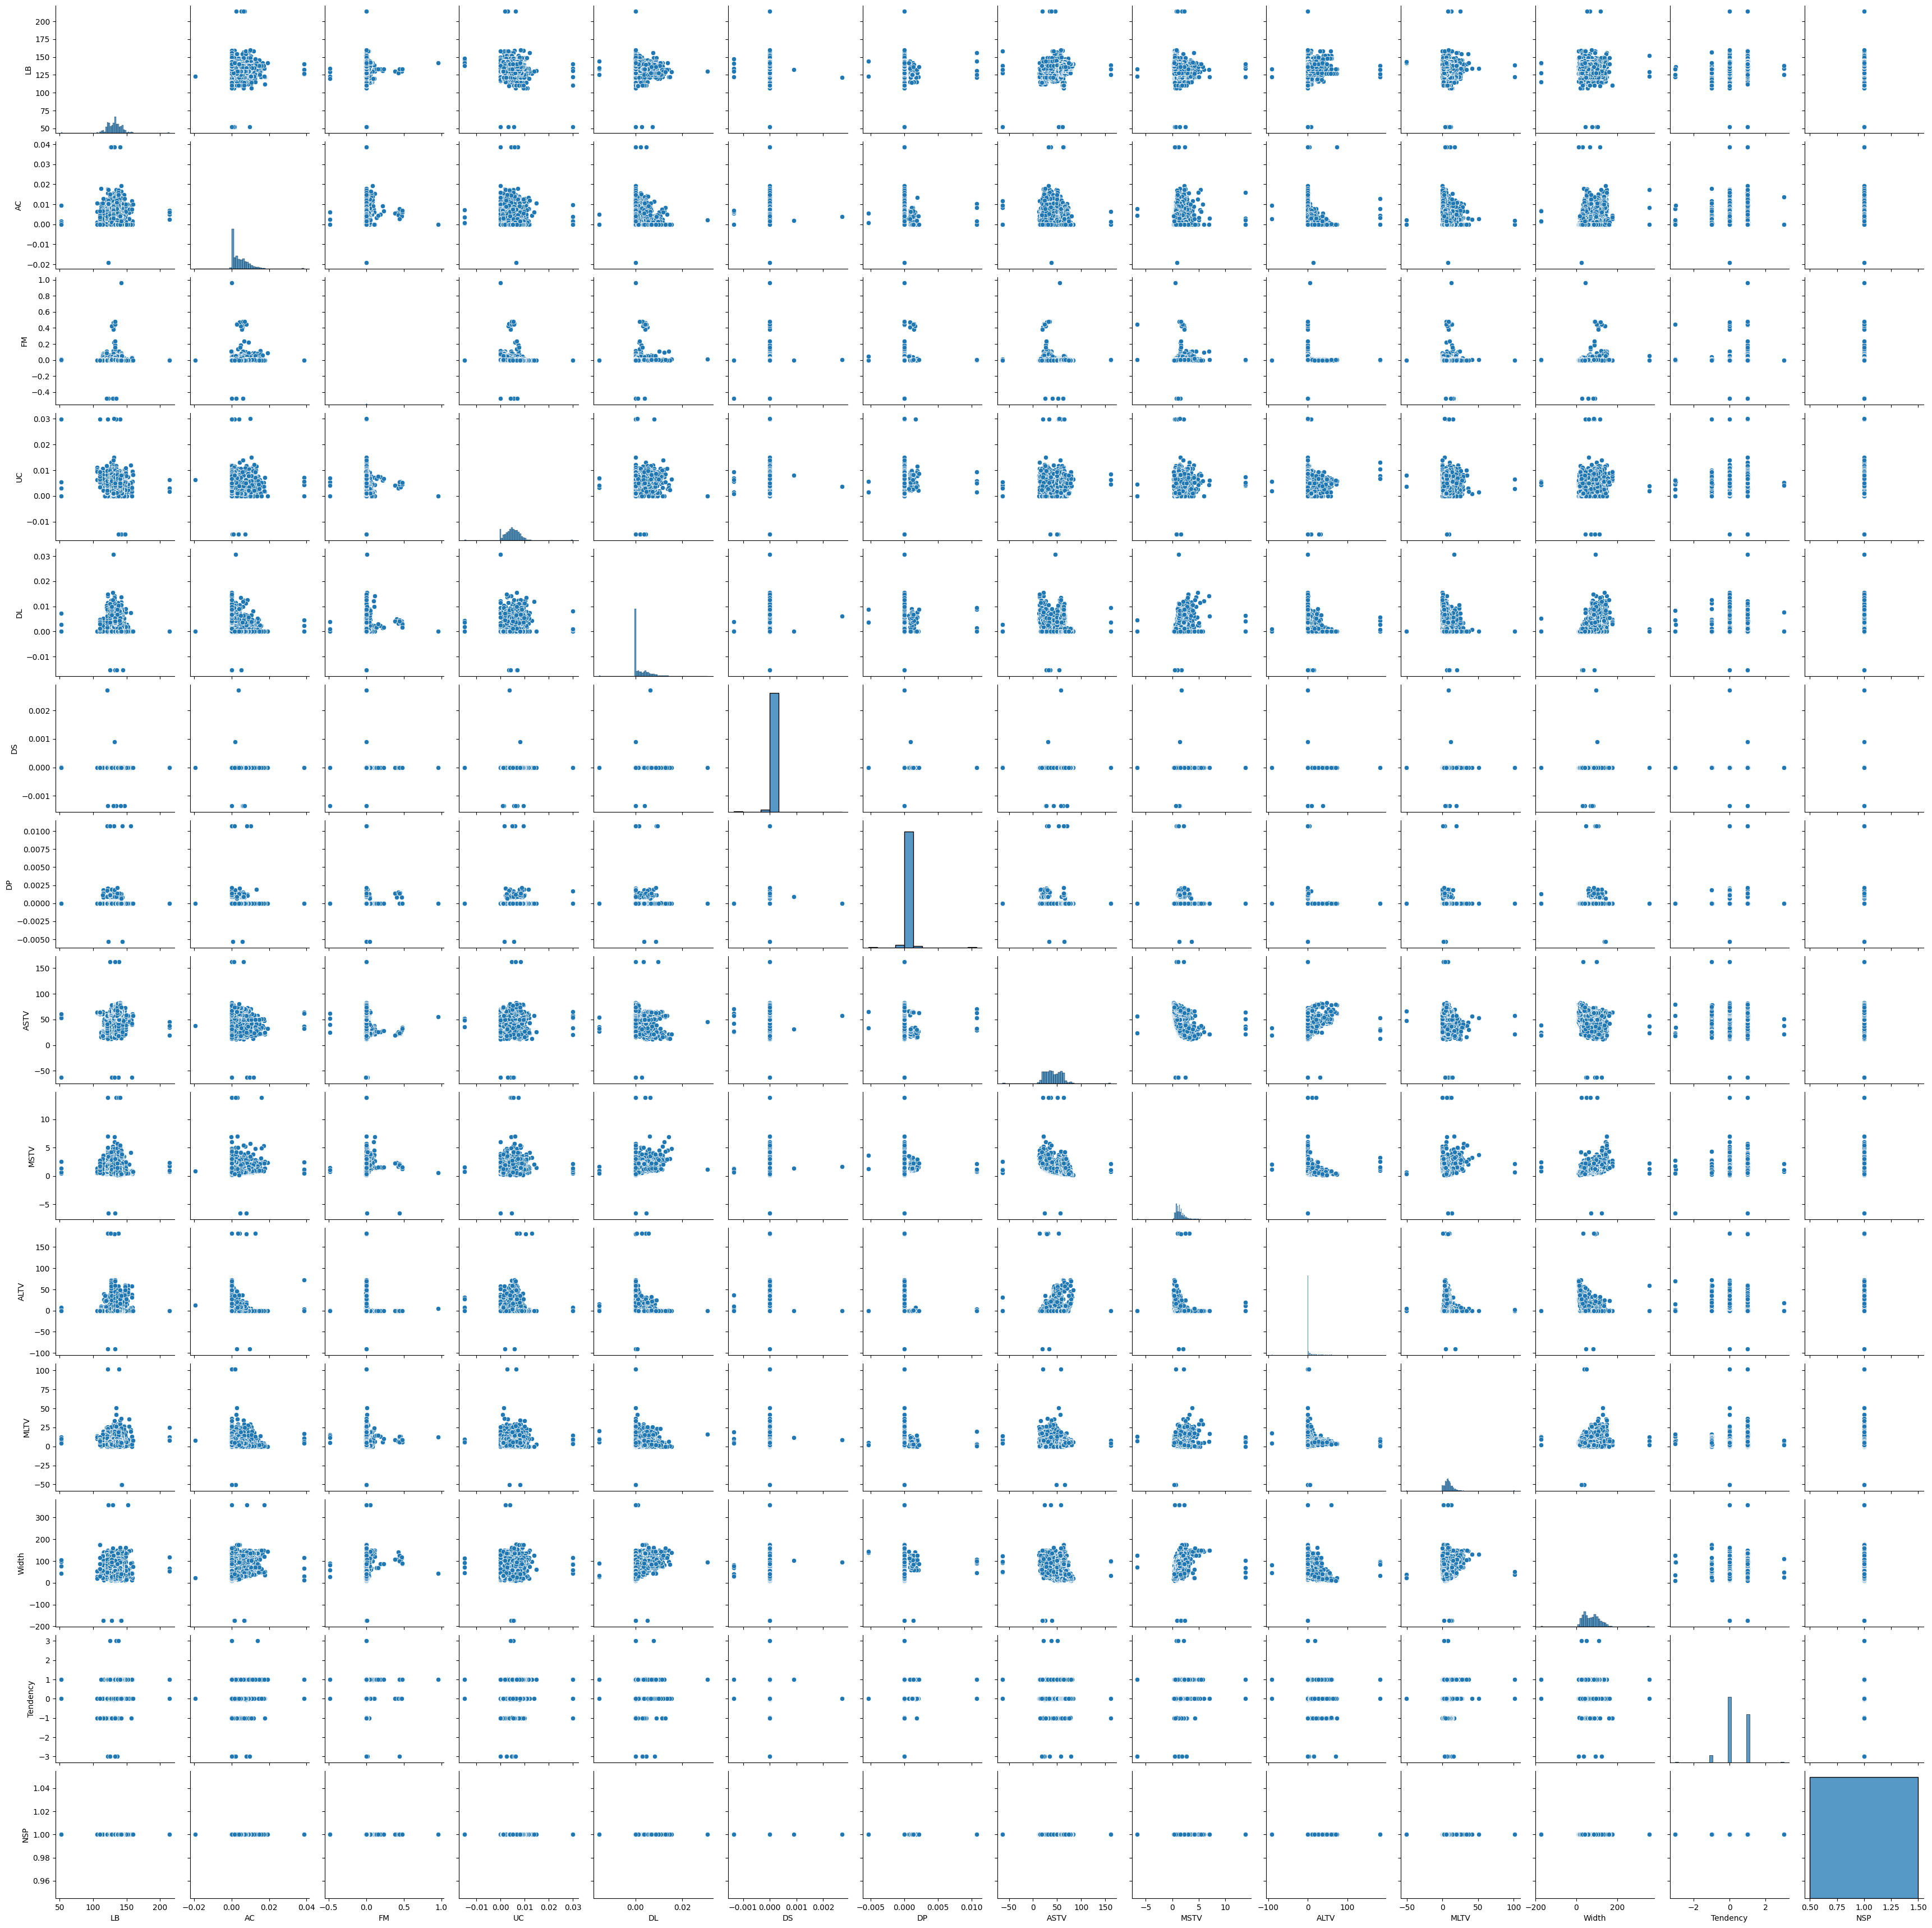

In [ ]:
sns.pairplot(data)



# 4.Pattern Recognition and Insights

In [ ]:
strong_correlation = correlation_matrix[(correlation_matrix>0.5)&(correlation_matrix<1.0)]
print("Strong Correlation")
strong_correlation

Strong Correlation


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 5.Conclusion

In [ ]:
print("Conclusion:")
print("In this EDA process on the given dataset, the null values are replaced with the mean values and median values and outliers are detected using IQR method and deleted respectively.")
print("By correlation matrix we can know the relation between the variables, corr() is used to get the correlation values it lies between -1 to +1 .")
print('A heatmap is a great way to visually inspect the relationships between multiple variables in a dataset')
print('Heatmap is used to visualize the relation between the variables.')


Conclusion:
In this EDA process on the given dataset, the null values are replaced with the mean values and median values and outliers are detected using IQR method and deleted respectively.
By correlation matrix we can know the relation between the variables, corr() is used to get the correlation values it lies between -1 to +1 .
A heatmap is a great way to visually inspect the relationships between multiple variables in a dataset
Heatmap is used to visualize the relation between the variables.


In [ ]:
print("key insights from the dataset:")
print("There is no much correlation between the variables in the dataset.")
print("This finding will going to help in decision making and model development.")

key insights from the dataset:
There is no much correlation between the variables in the dataset.
This finding will going to help in decision making and model development.
